# UNSPERVISED LEARNING - RODRIGO


## Importando Bibliotecas

In [24]:
#importando bibliotecas básicas
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,  OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import model_selection, metrics, tree
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.compose import ColumnTransformer

%matplotlib inline

from ydata_profiling import ProfileReport

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

## Importando Datasets

In [25]:
df = pd.read_csv('segmentation data.csv')

## Clustering

In [26]:
# Análise preliminar
print(df.head())  # Visualizar as primeiras linhas do dataframe
print(df.describe())  # Resumo estatístico do dataframe

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000       

In [27]:
# Verificar valores nulos
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [28]:
# Removendo a coluna Customer ID
df.drop('CustomerID', axis=1, inplace=True)  # Remover coluna 'CustomerID' 
df.dropna(inplace=True)  # Remover linhas com dados ausentes

### Algumas Análises em Gráfico

<Figure size 1500x1000 with 0 Axes>

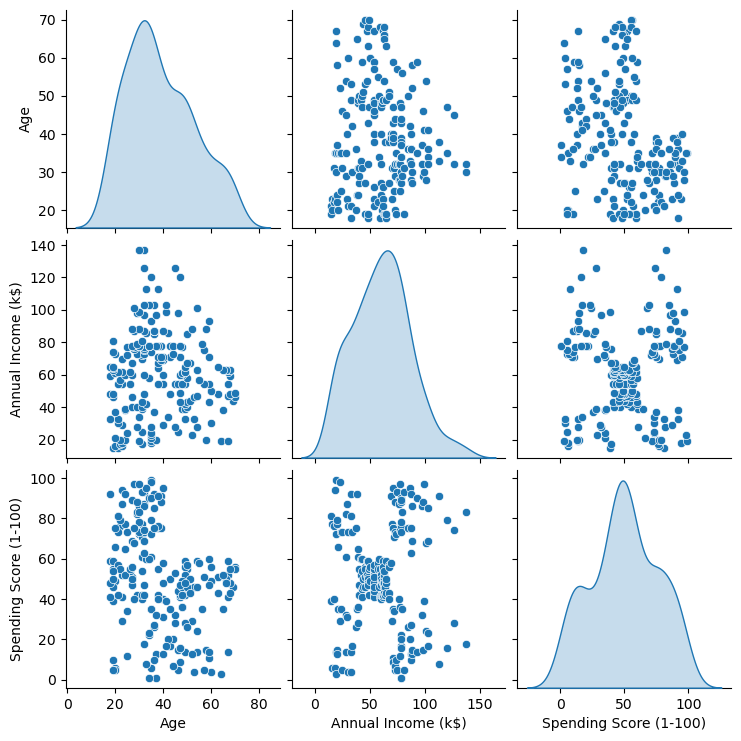

In [30]:
# Gráficos para análise
plt.figure(figsize=(15, 10))
sns.pairplot(df, diag_kind='kde')  # Gráfico de dispersão e histogramas das variáveis
plt.show()

### Categorização dos dados

In [31]:
# Efetuando uma codificação one-hot na coluna "Gender" através do mapeamento para valores numéricos
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 2})

### Normalização dos Dados

In [32]:
# Normalização dos dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

### Efetuando o Clustering

Aplicando o Elbow Method(metodo do cotovelo) para descobrir o número ideal de clusters

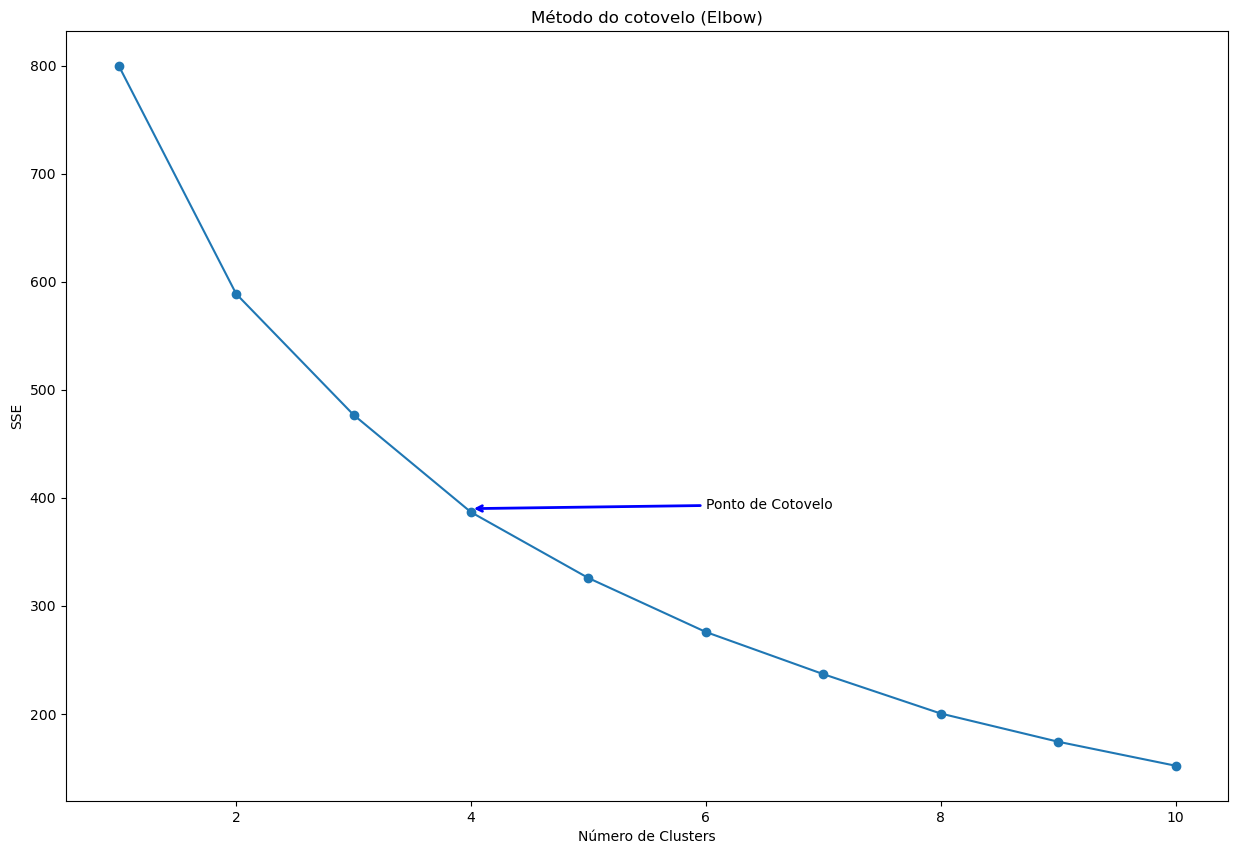

In [33]:
# Determinar o número ideal de clusters usando o método do cotovelo (Elbow)
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init = 'k-means++', random_state=40)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

# Carregando gráfico do método cotovelo (Elbow)
plt.figure(figsize=(15, 10))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')
plt.title('Método do cotovelo (Elbow)')
plt.annotate('Ponto de Cotovelo', xy=(4, 390), xytext=(6, 390), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))
plt.show()

O número 4 foi o número ideal para o clustering em k-means e Agglomerative Clustering

K-means

In [34]:
# Efetuando o clustering com K-Means
kmeans = KMeans(n_clusters=4, random_state=40)
kmeans.fit(df_scaled)
df['KMeans Clustering'] = kmeans.labels_



DBSCAN

In [35]:
# Efetuando o clustering com DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(df_scaled)
df['DBSCAN Clustering'] = dbscan.labels_



Agglomerative Clustering

In [36]:
# Efetuando o clustering com Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_clustering.fit(df_scaled)
df['Agglomerative Clustering'] = agg_clustering.labels_

Análise pós-clustering

In [37]:
# Número de perfis de clientes segmentados
num_perfis_kmeans = len(df['KMeans Clustering'].unique())
num_perfis_dbscan = len(df['DBSCAN Clustering'].unique())
num_perfis_aggcl = len(df['Agglomerative Clustering'].unique())

In [38]:
print(df.head())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)  KMeans Clustering  \
0       1   19                  15                      39                  1   
1       1   21                  15                      81                  1   
2       2   20                  16                       6                  2   
3       2   23                  16                      77                  3   
4       2   31                  17                      40                  3   

   DBSCAN Clustering  Agglomerative Clustering  
0                 -1                         1  
1                 -1                         1  
2                 -1                         0  
3                 -1                         1  
4                 -1                         0  


In [39]:
# Principais características dos clientes segmentados
caracteristicas = ['Age', 'Gender', 'Annual Income (k$)', 'Spending Score (1-100)']
principais_caracteristicas_kmeans = df.groupby('KMeans Clustering')[caracteristicas].mean()
principais_caracteristicas_dbscan = df.groupby('DBSCAN Clustering')[caracteristicas].mean()
principais_caracteristicas_aggcl = df.groupby('Agglomerative Clustering')[caracteristicas].mean()


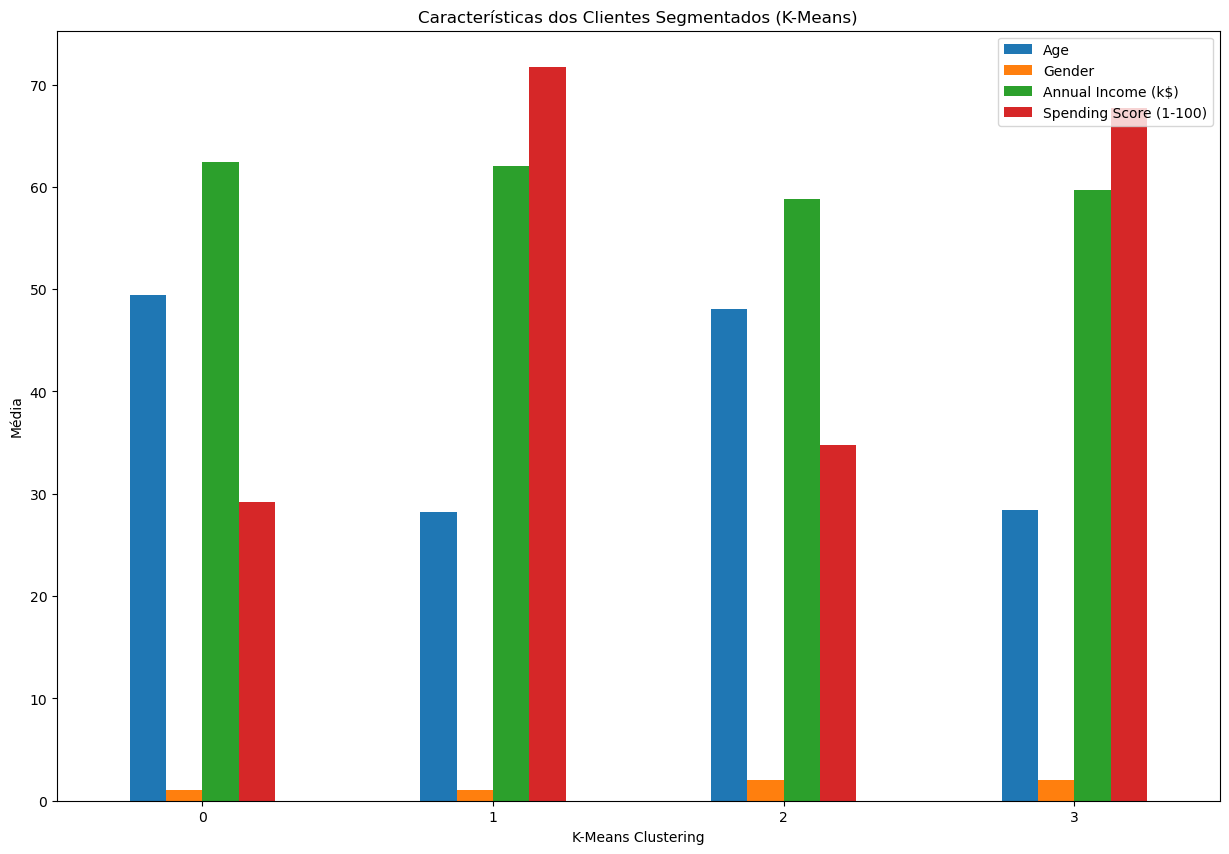

In [40]:
# Principais características dos clientes segmentados pelo K-Means
caracteristicas = ['Age', 'Gender', 'Annual Income (k$)', 'Spending Score (1-100)']
principais_caracteristicas_kmeans = df.groupby('KMeans Clustering')[caracteristicas].mean()

# Plotar gráfico de barras
principais_caracteristicas_kmeans.plot(kind='bar', figsize=(15, 10))
plt.xlabel('K-Means Clustering')
plt.ylabel('Média')
plt.title('Características dos Clientes Segmentados (K-Means)')
plt.xticks(rotation='horizontal')
plt.legend(loc='upper right')
plt.show()

In [41]:
# Perfil dos clientes dominantes e minoritários

perfil_donimante_kmeans = df['KMeans Clustering'].value_counts().idxmax()
perfil_dominante_dbscan = df['DBSCAN Clustering'].value_counts().idxmax()
perfil_dominante_aggcl = df['Agglomerative Clustering'].value_counts().idxmax()
perfil_minoritario_kmeans = df['KMeans Clustering'].value_counts().idxmin()
perfil_minoritario_dbscan = df['DBSCAN Clustering'].value_counts().idxmin()
perfil_minoritario_aggcl = df['Agglomerative Clustering'].value_counts().idxmin()


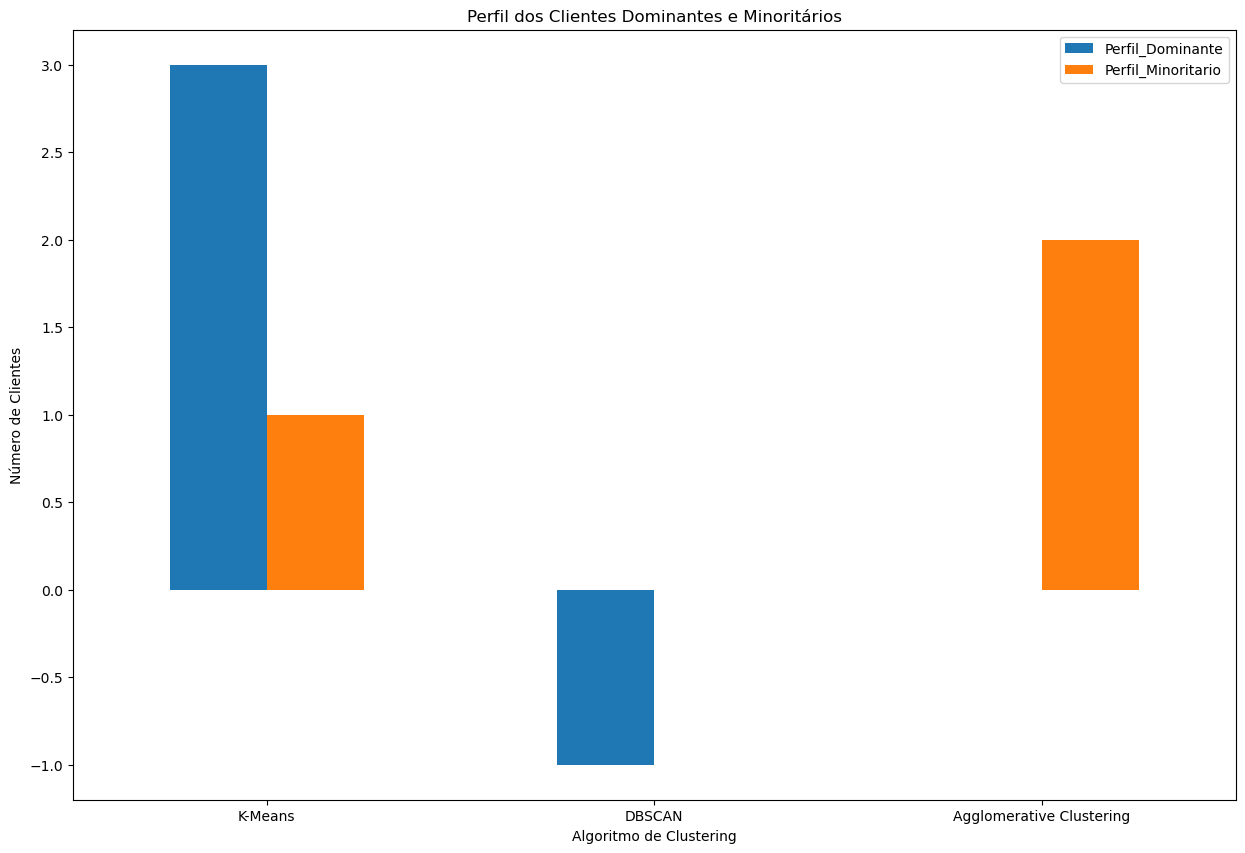

In [42]:
# Criar DataFrame com os perfis dominantes e minoritários
df_profiles = pd.DataFrame({
    'Algoritmos': ['K-Means', 'DBSCAN', 'Agglomerative Clustering'],
    'Perfil_Dominante': [perfil_donimante_kmeans, perfil_dominante_dbscan, perfil_dominante_aggcl],
    'Perfil_Minoritario': [perfil_minoritario_kmeans, perfil_minoritario_dbscan, perfil_minoritario_aggcl]
})

# Plotar gráfico de barras
fig, ax = plt.subplots(figsize=(15, 10))
df_profiles.plot(x='Algoritmos', y=['Perfil_Dominante', 'Perfil_Minoritario'], kind='bar', ax=ax)
plt.xlabel('Algoritmo de Clustering')
plt.ylabel('Número de Clientes')
plt.title('Perfil dos Clientes Dominantes e Minoritários')
plt.xticks(rotation='horizontal')
plt.legend(loc='upper right')
plt.show()

In [43]:
# Verificar separação dos clusters
separacao_kmeans = df.groupby('KMeans Clustering').size().min()
separacao_dbscan = df.groupby('DBSCAN Clustering').size().min()
separacao_aggcl = df.groupby('Agglomerative Clustering').size().min()

In [44]:
num_perfis = len(df['KMeans Clustering'].unique())
caracteristicas= ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
principais_caracteristicas = df.groupby('KMeans Clustering')[caracteristicas].mean()
perfil_dominante = df['KMeans Clustering'].value_counts().idxmax()
perfil_minoriario = df['KMeans Clustering'].value_counts().idxmin()
tamanho_clusters = df['KMeans Clustering'].value_counts()
separacao = tamanho_clusters.min() / tamanho_clusters.max()


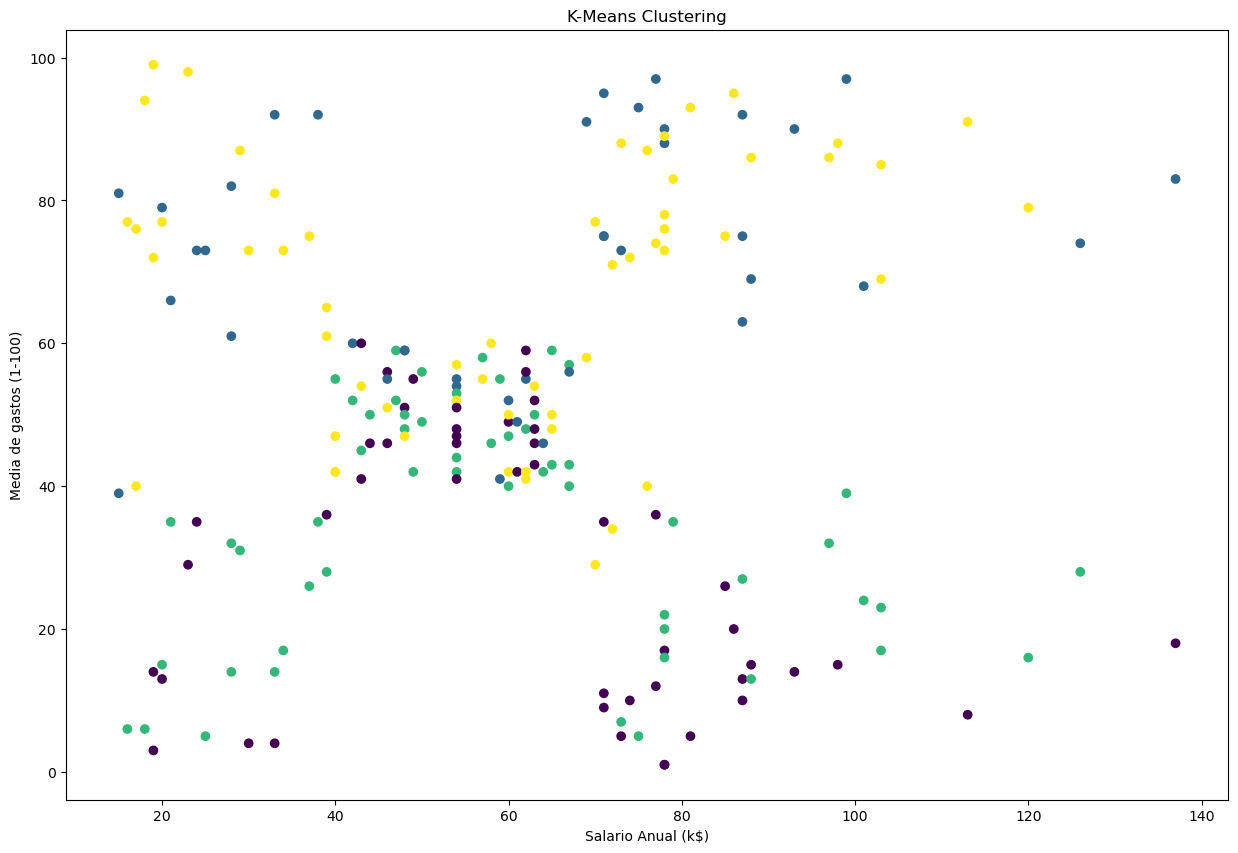

In [45]:
# Gerar gráfico dos clusters

plt.figure(figsize=(15, 10))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['KMeans Clustering'], cmap='viridis')
plt.xlabel('Salario Anual (k$)')
plt.ylabel('Media de gastos (1-100)')
plt.title('K-Means Clustering')
plt.show()

## conclusões

In [46]:
#RESULTADOS DO CLUSTERING

print("Número de perfis de clientes segmentados:", num_perfis, '\n') 
print("Principais características dos clientes segmentados: \n")
print(principais_caracteristicas, '\n')
print("Perfil mais dominante:", perfil_dominante, '\n')
print("Perfil menos dominante:", perfil_minoriario, '\n') 
print("Proporção de separação dos clusters:", separacao, '\n') 

Número de perfis de clientes segmentados: 4 

Principais características dos clientes segmentados: 

                         Age  Annual Income (k$)  Spending Score (1-100)
KMeans Clustering                                                       
0                  49.437500           62.416667               29.208333
1                  28.250000           62.000000               71.675000
2                  48.109091           58.818182               34.781818
3                  28.438596           59.666667               67.684211 

Perfil mais dominante: 3 

Perfil menos dominante: 1 

Proporção de separação dos clusters: 0.7017543859649122 



## Collaborative Filtering:

In [49]:
import pandas as pd
from surprise import SVD, Dataset, Reader
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [50]:
# Carregar os dados de avaliações
ratings = pd.read_csv('ratings.csv')

# Carregar os dados de mapeamento de anedotas(piadas)
items = pd.read_csv('items.csv')

In [51]:
items.head()  # 05 primeiras linhas do dataframe intens anedotas(piadas)

,jokeId,jokeText
0,1,"A man visits the doctor. The doctor says ""I ha..."
1,2,This couple had an excellent relationship goin...
2,3,Q. What's 200 feet long and has 4 teeth? \n\nA...
3,4,Q. What's the difference between a man and a t...
4,5,Q.\tWhat's O. J. Simpson's Internet address? \...


In [52]:

items.describe()  # Descrição do dataframe itens anedotas(piadas)

,jokeId
count,150.000000
mean,75.500000
std,43.445368
min,1.000000
25%,38.250000
50%,75.500000
75%,112.750000
max,150.000000


In [53]:
ratings.head() #05 primeiras linhas do dataframe ratings - avaliação das anedotas(piadas)

,userId,jokeId,rating
0,1,5,0.219
1,1,7,-9.281
2,1,8,-9.281
3,1,13,-6.781
4,1,15,0.875


In [54]:
ratings.describe() # Descrição do do dataframe ratings - avaliação das anedotas(piadas)

,userId,jokeId,rating
count,1.761439e+06,1.761439e+06,1.761439e+06
mean,3.272322e+04,7.071133e+01,1.618602e+00
std,1.828011e+04,4.600790e+01,5.302608e+00
min,1.000000e+00,5.000000e+00,-1.000000e+01
25%,1.720200e+04,2.100000e+01,-2.031000e+00
50%,3.480800e+04,6.900000e+01,2.219000e+00
75%,4.730600e+04,1.120000e+02,5.719000e+00
max,6.397800e+04,1.500000e+02,1.000000e+01


In [55]:
# Merge dos datasets
merged_df = ratings.merge(items, on='jokeId')

In [56]:
# Criar o objeto Reader para interpretar os dados
reader = Reader(rating_scale=(-10, 10))

<Figure size 1500x1000 with 0 Axes>

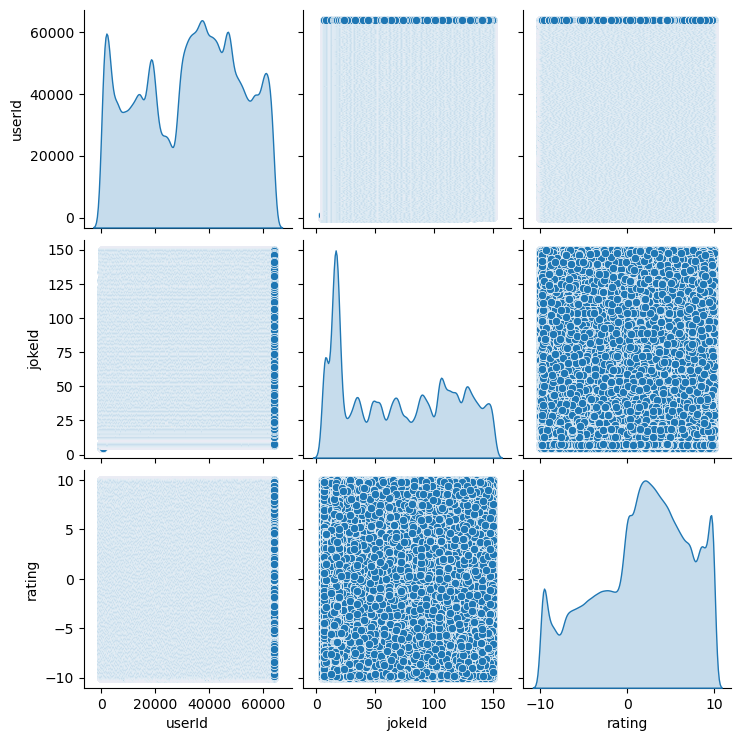

In [57]:
# Gráficos do merge das bases de dados
plt.figure(figsize=(15, 10))
sns.pairplot(merged_df, diag_kind='kde')  
plt.show()


In [58]:
#05 mlhores anedotas(piadas)
merged_df.groupby(['rating'], sort=False)['userId'].mean().sort_values(ascending=False).head(5)

rating
 8.500    34311.070038
 0.719    34241.869051
 7.406    34183.343408
 0.438    34115.520993
-0.125    34109.821367
Name: userId, dtype: float64

In [59]:
# Carregar os dados no formato esperado pelo Surprise
data = Dataset.load_from_df(merged_df[['userId', 'jokeId', 'rating']], reader)


In [60]:
# Treinar o modelo SVD
model = SVD()
trainset = data.build_full_trainset()
model.fit(trainset)

In [61]:
# Selecionar 3 usuários com gostos diferentes
selected_users = [1, 50, 100]

In [62]:
# Gerar recomendações para os usuários selecionados
top_n = 5  # Número de anedotas(piadas) a serem recomendadas

In [63]:
for user_id in selected_users:
    # Gerar as previsões de rating para todas as anedotas(piadas) não avaliadas pelo usuário
    testset = trainset.build_anti_testset()
    testset = filter(lambda x: x[0] == user_id, testset)
    predictions = model.test(testset)
    
    # Ordenar as anedotas(piadas) com base nas previsões de rating
    top_recs = sorted(predictions, key=lambda x: x.est, reverse=True)[:top_n]
    
    # Imprimir as recomendações das anedotas(piadas) para o usuário
    print("Recomendações para o Usuário", user_id, ":")
    for rec in top_recs:
        joke_text = merged_df.loc[merged_df['jokeId'] == rec.iid, 'jokeText'].values
        if len(joke_text) > 0:
            print("Anedota:", rec.iid, "Rating:", rec.est, "Texto:", joke_text[0])
print()



Recomendações para o Usuário 1 :
Anedota: 138 Rating: 9.75051566075081 Texto: WASHINGTON (Reuters) - A tragic fire on Monday destroyed the personal library of President George W. Bush. Both of his books have been lost. Presidential spokesman Ari Fleischer said the president was devastated, as he had not finished coloring the second one.
Anedota: 140 Rating: 9.229524955784598 Texto: Chuck Norris' calendar goes straight from March 31st to April 2nd; no one fools Chuck Norris.
Anedota: 117 Rating: 8.98898494321273 Texto: A man joins a big corporate empire as a trainee. On his very first day of work, he dials the pantry and shouts into the phone: "Get me a coffee, quickly!" The voice from the other side responds, "You fool, you've dialed the wrong extension! Do you know who you're talking to, dumbo?" "No," replied the trainee. "It's the CEO of the company, you fool!" The trainee shouts back, "And do YOU know who YOU are talking to, you fool?!" "No." replied the CEO indignantly. "Good!" rep